# Coffee Sales Exploratory Data Analysis 
### Dataset has coffee sales from a vending machine. 

# 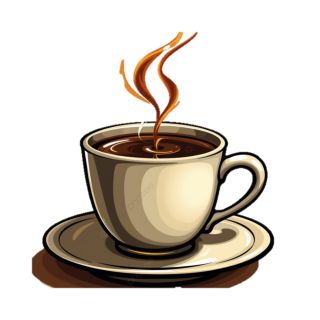

#### This notebook is an analysis of purchasing patterns.
#### This includes most sold coffee type, cofee sales reviewed in an hourly, daily, and monthly timeframe. 
#### This analysis identifies the most preffered coffee preferences of the customers through 2024.
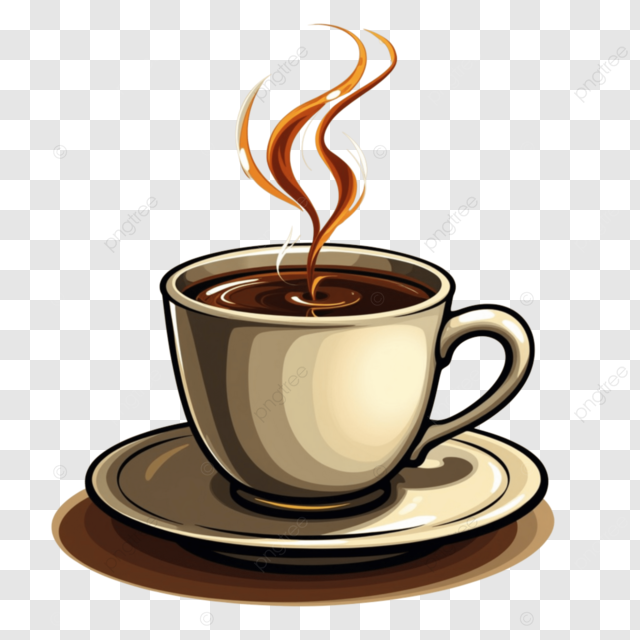

## Load Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/coffee-sales/index.csv


In [2]:
df = pd.read_csv('/kaggle/input/coffee-sales/index.csv')
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
2618,2024-12-23,2024-12-23 15:00:23.679,card,ANON-0000-0000-1036,30.86,Americano with Milk
2619,2024-12-23,2024-12-23 16:14:50.443,card,ANON-0000-0000-0906,35.76,Latte
2620,2024-12-23,2024-12-23 17:21:20.495,card,ANON-0000-0000-1037,25.96,Cortado
2621,2024-12-23,2024-12-23 17:22:40.297,card,ANON-0000-0000-1037,35.76,Latte


## Data Cleaning
#### Identify if there is any missing data and clean dataset as necessary for analysis.

In [3]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [4]:
df['card'].describe()

count                    2534
unique                   1037
top       ANON-0000-0000-0012
freq                      122
Name: card, dtype: object

#### Coffee Drinker ANON 12 is very caffeinated.
#### Missing values in card column are when customers pay in cash. 

In [5]:
df.dtypes

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes #Verify updated datetime to correct type 

date                   object
datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object

### Create columns to plot different time intervals
#### Dataset for coffee sold only in 2024.

In [7]:
#Create columns for hour, day, month of coffee purchases
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month

## Data Visualization
### Plot histograms of the number of coffee cups sold per hour of day, day of the month, and month.

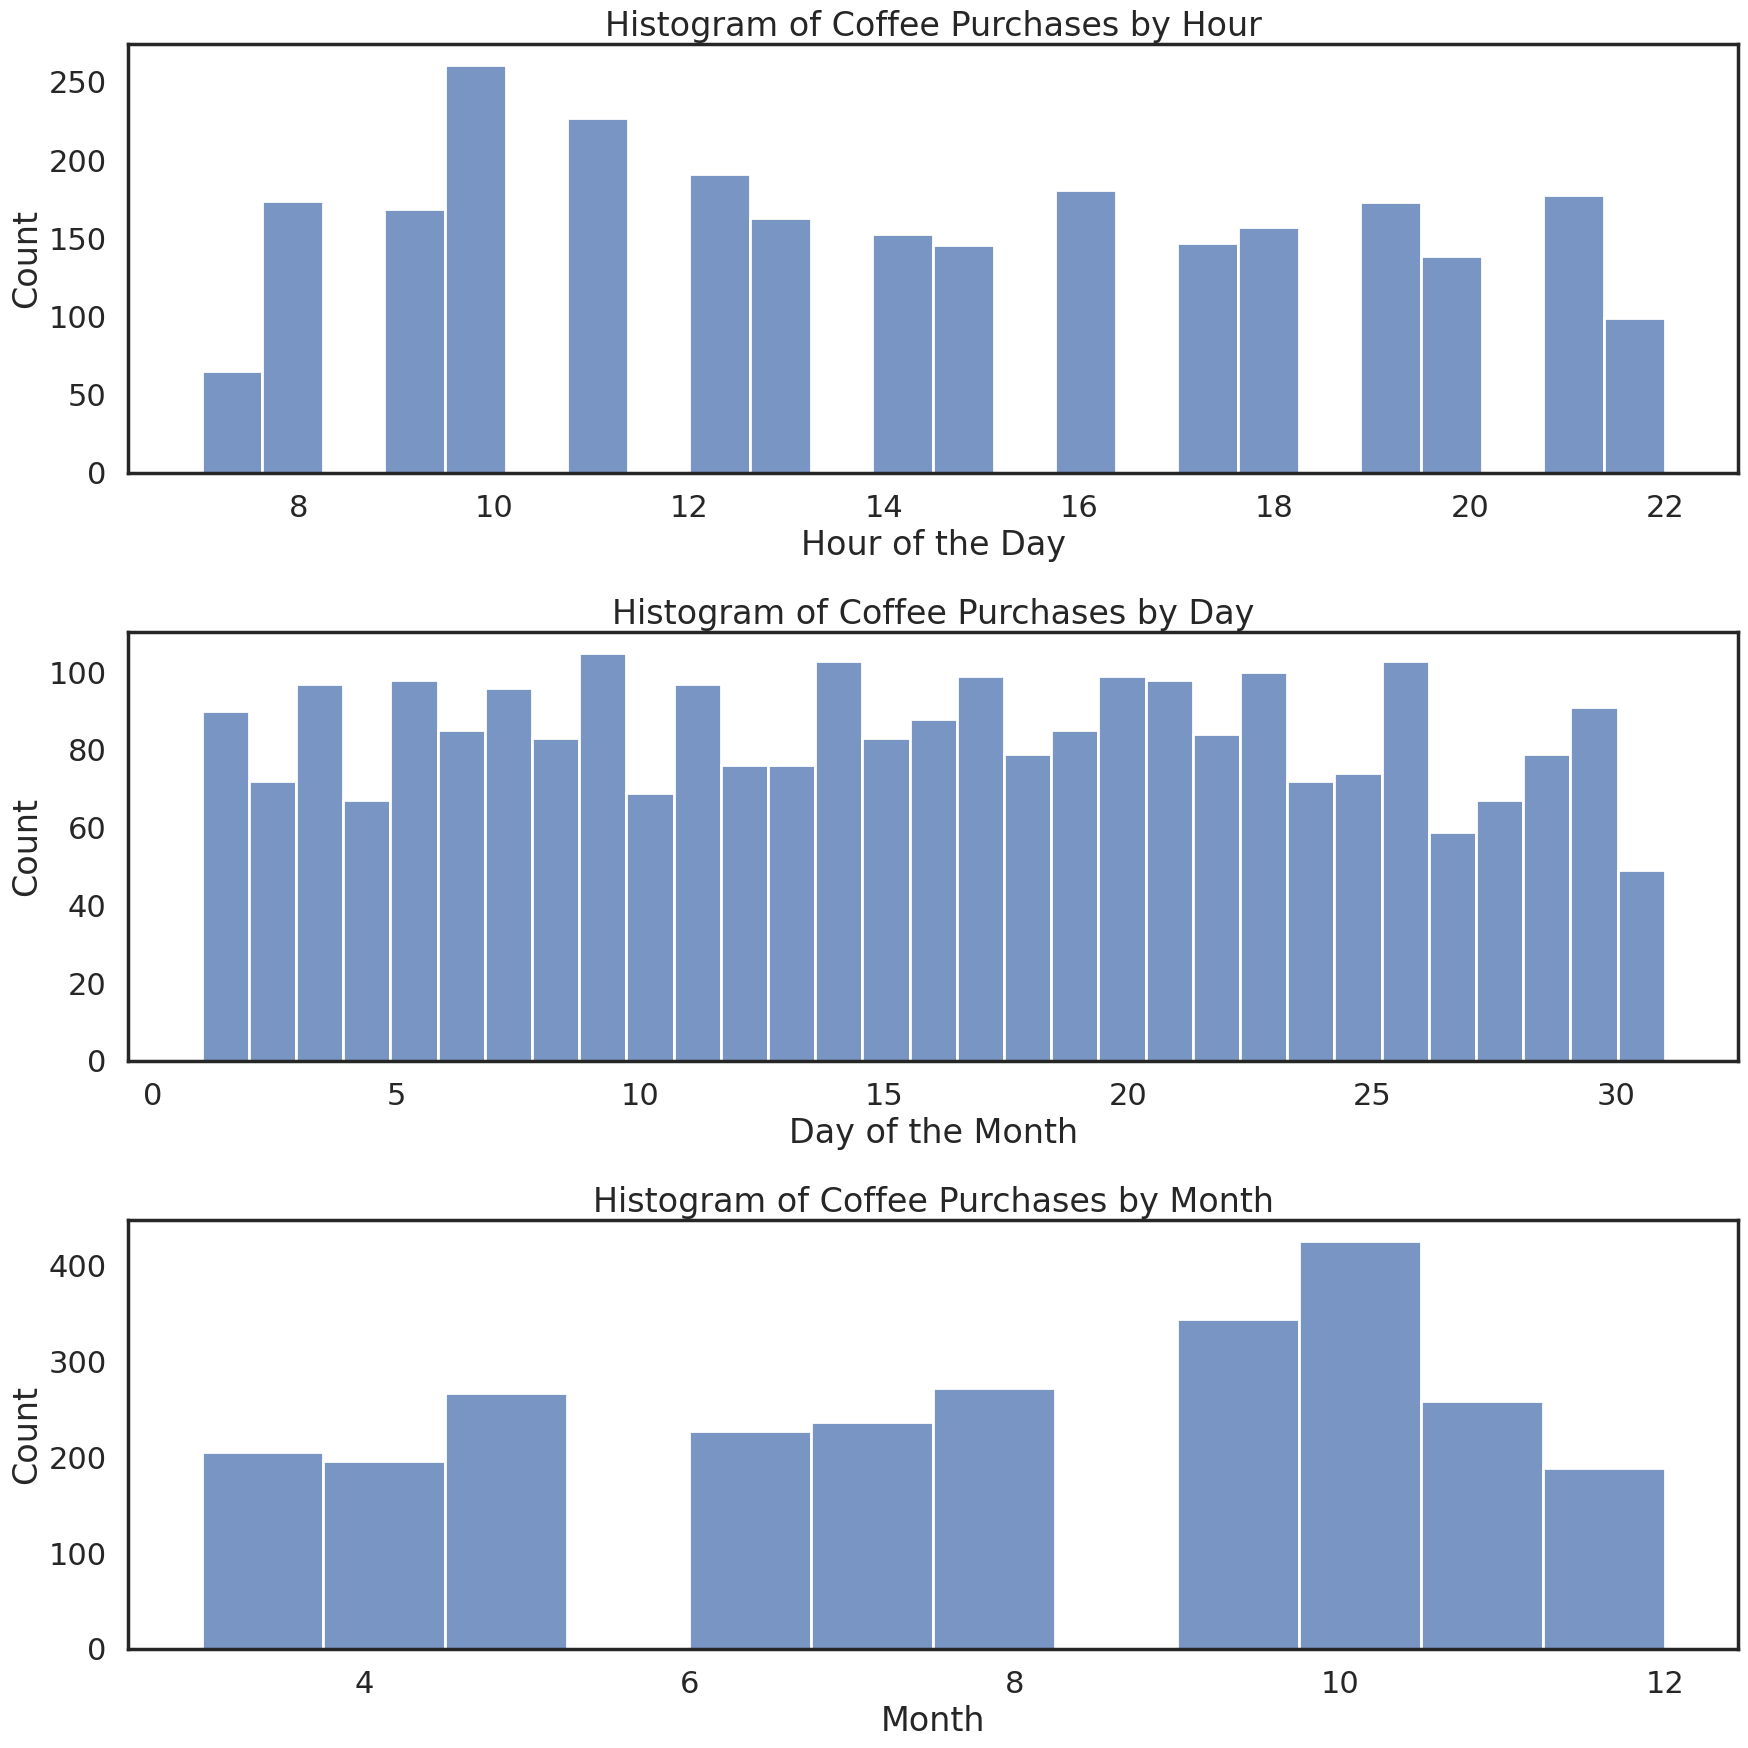

In [8]:
# Plot stacked histograms
plt.figure(figsize=(18, 18))

sns.set(style="white")
sns.set_context("poster")

# Hour
plt.subplot(3, 1, 1)
sns.histplot(data=df, x='hour', multiple='stack', bins=24, palette='viridis')
plt.title('Histogram of Coffee Purchases by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')

# Day
plt.subplot(3, 1, 2)
sns.histplot(data=df, x='day', multiple='stack', bins=31, palette='viridis')
plt.title('Histogram of Coffee Purchases by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Count')

# Month
plt.subplot(3, 1, 3)
sns.histplot(data=df, x='month', multiple='stack', bins=12, palette='viridis')
plt.title('Histogram of Coffee Purchases by Month')
plt.xlabel('Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Color number of coffee cups by the type of coffee sold during these timeframes. 

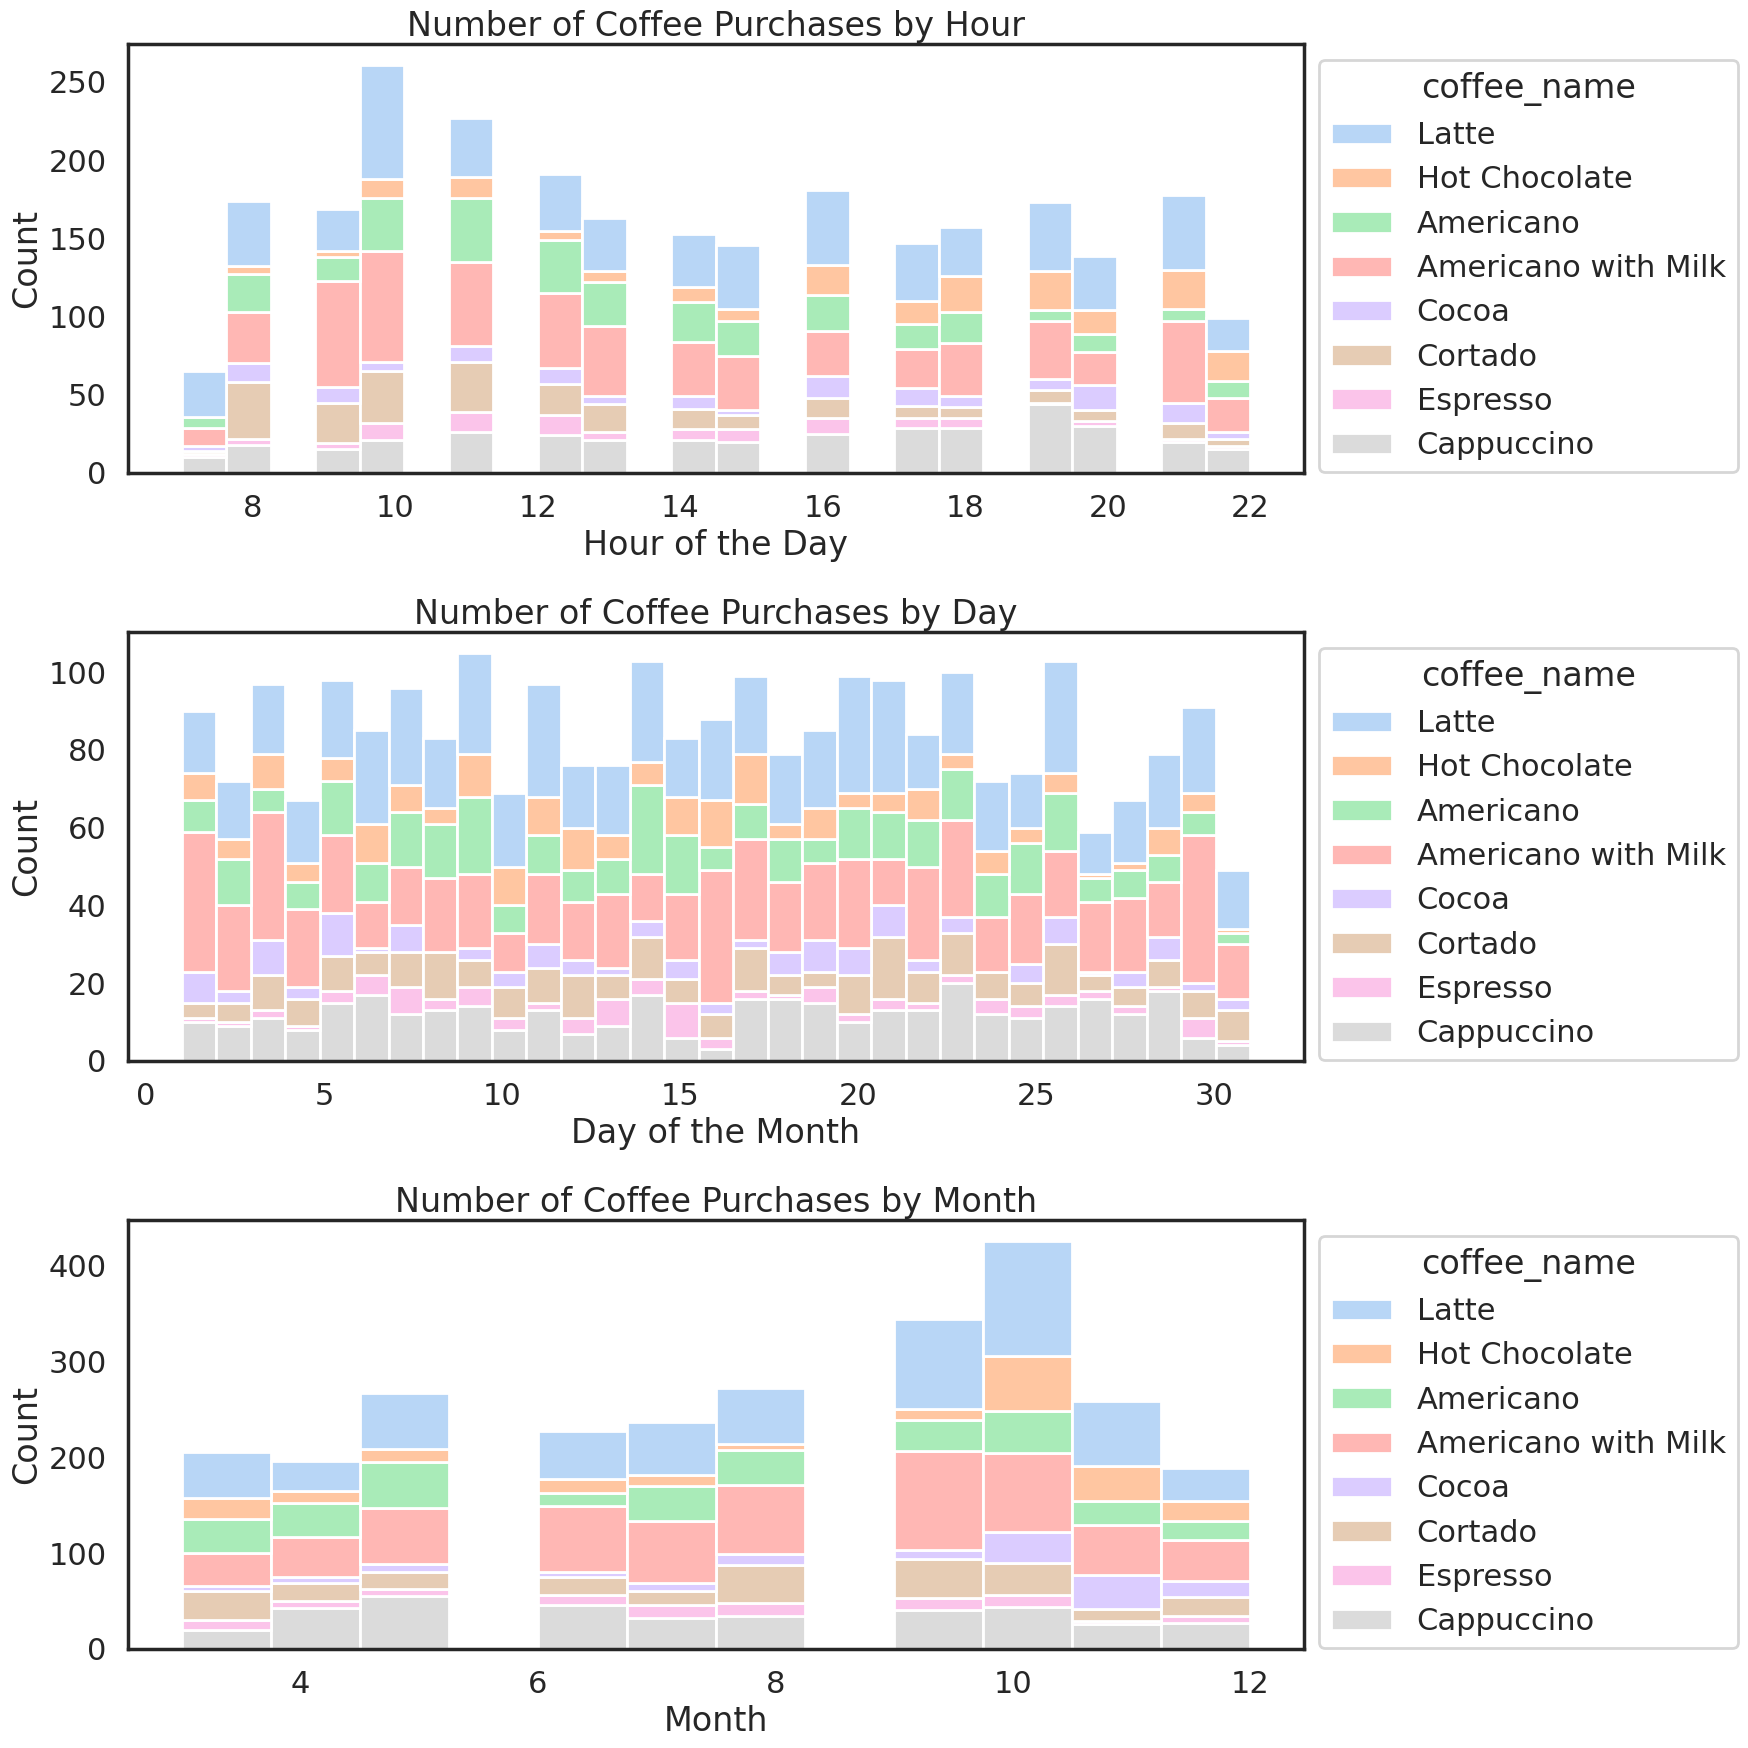

In [9]:
# Plot stacked histograms
plt.figure(figsize=(18, 18))

sns.set(style="white")
sns.set_context("poster")

# Hour
plt.subplot(3, 1, 1)
ax = sns.histplot(data=df, x='hour', multiple='stack', hue='coffee_name',bins=24, palette='pastel')
plt.title('Number of Coffee Purchases by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Day
plt.subplot(3, 1, 2)
ax = sns.histplot(data=df, x='day', multiple='stack', hue='coffee_name',bins=31, palette='pastel')
plt.title('Number of Coffee Purchases by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Month
plt.subplot(3, 1, 3)
ax = sns.histplot(data=df, x='month', multiple='stack', hue='coffee_name',bins=12, palette='pastel')
plt.title('Number of Coffee Purchases by Month')
plt.xlabel('Month')
plt.ylabel('Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

### Plot the distrubtion of coffee cups per day per coffee type over the entire year to determine supply demand each season.

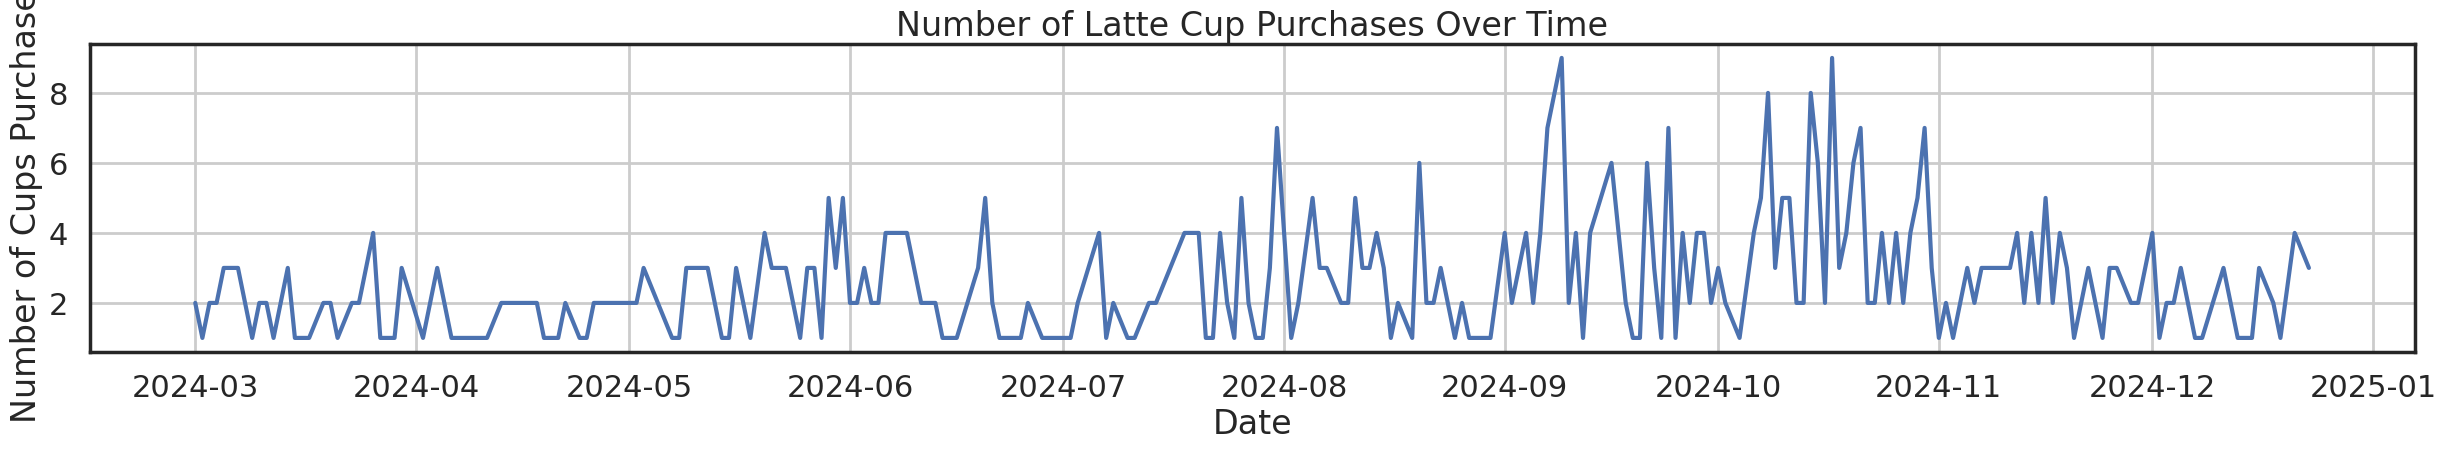

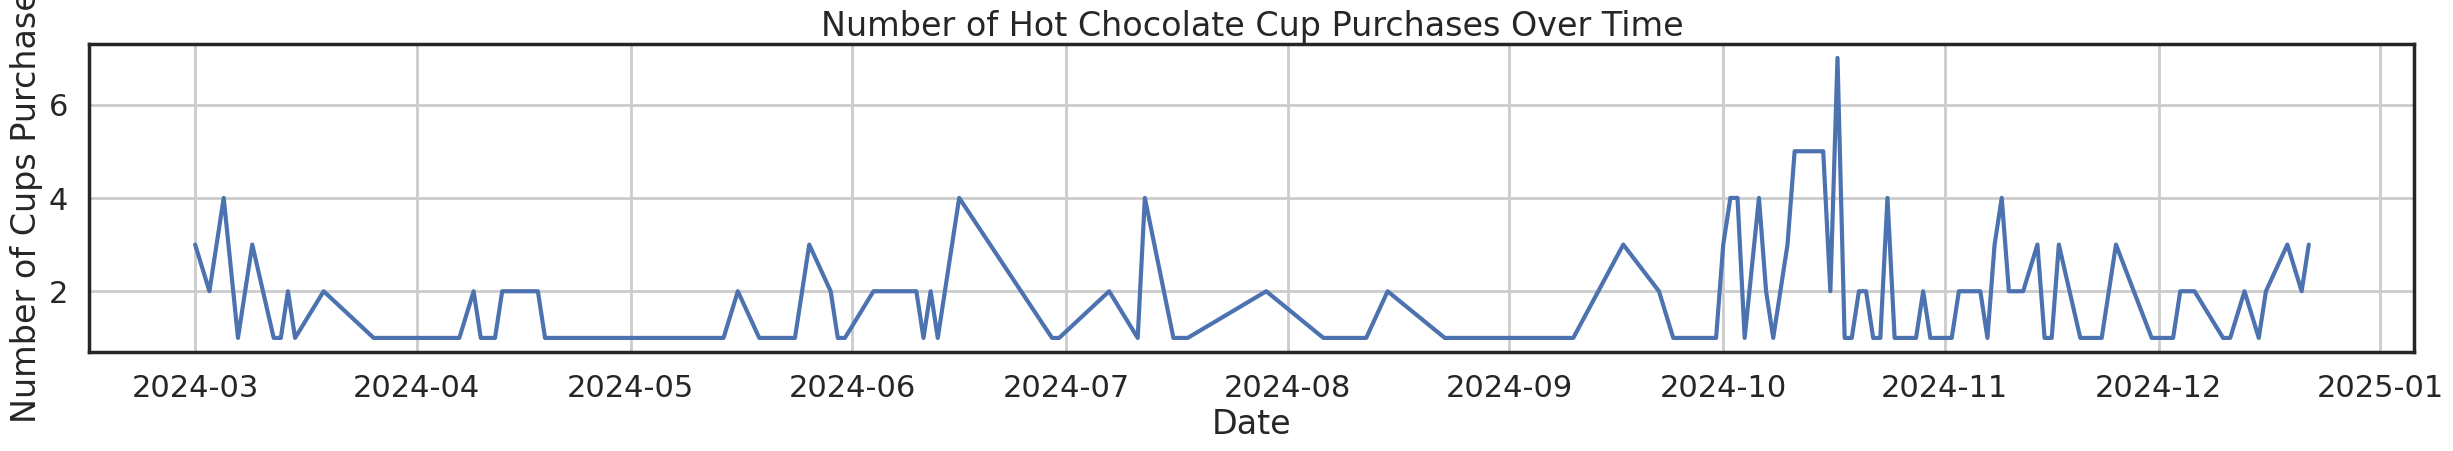

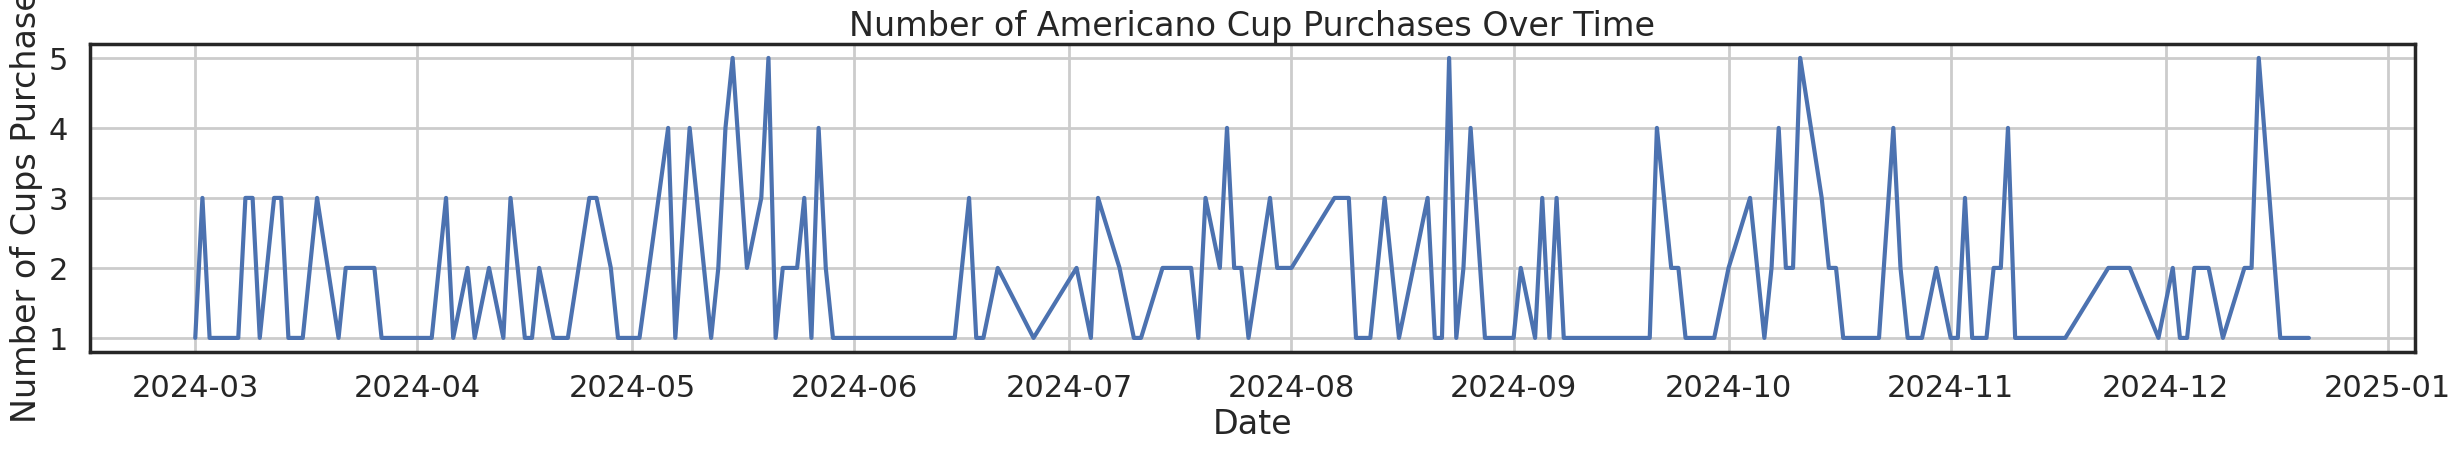

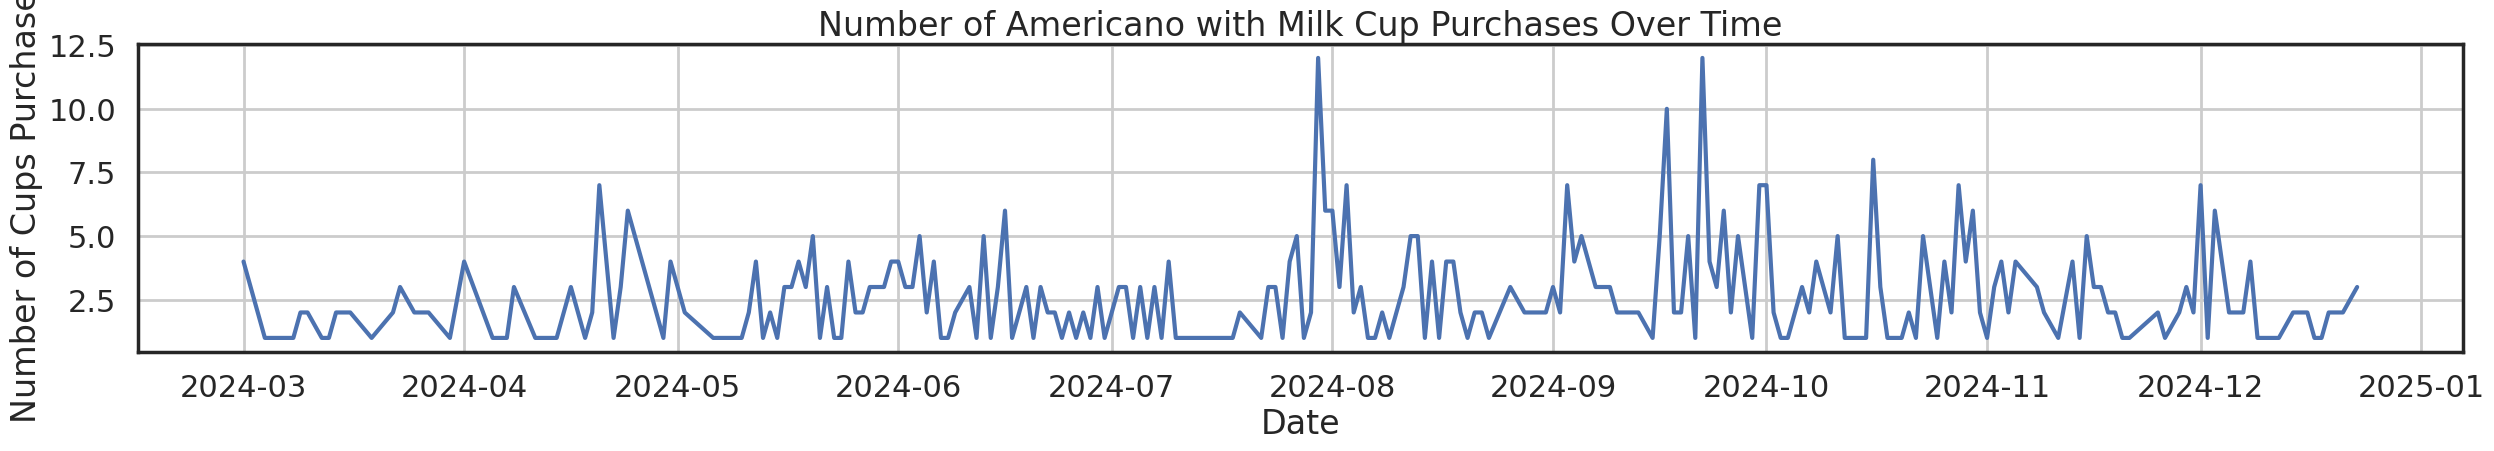

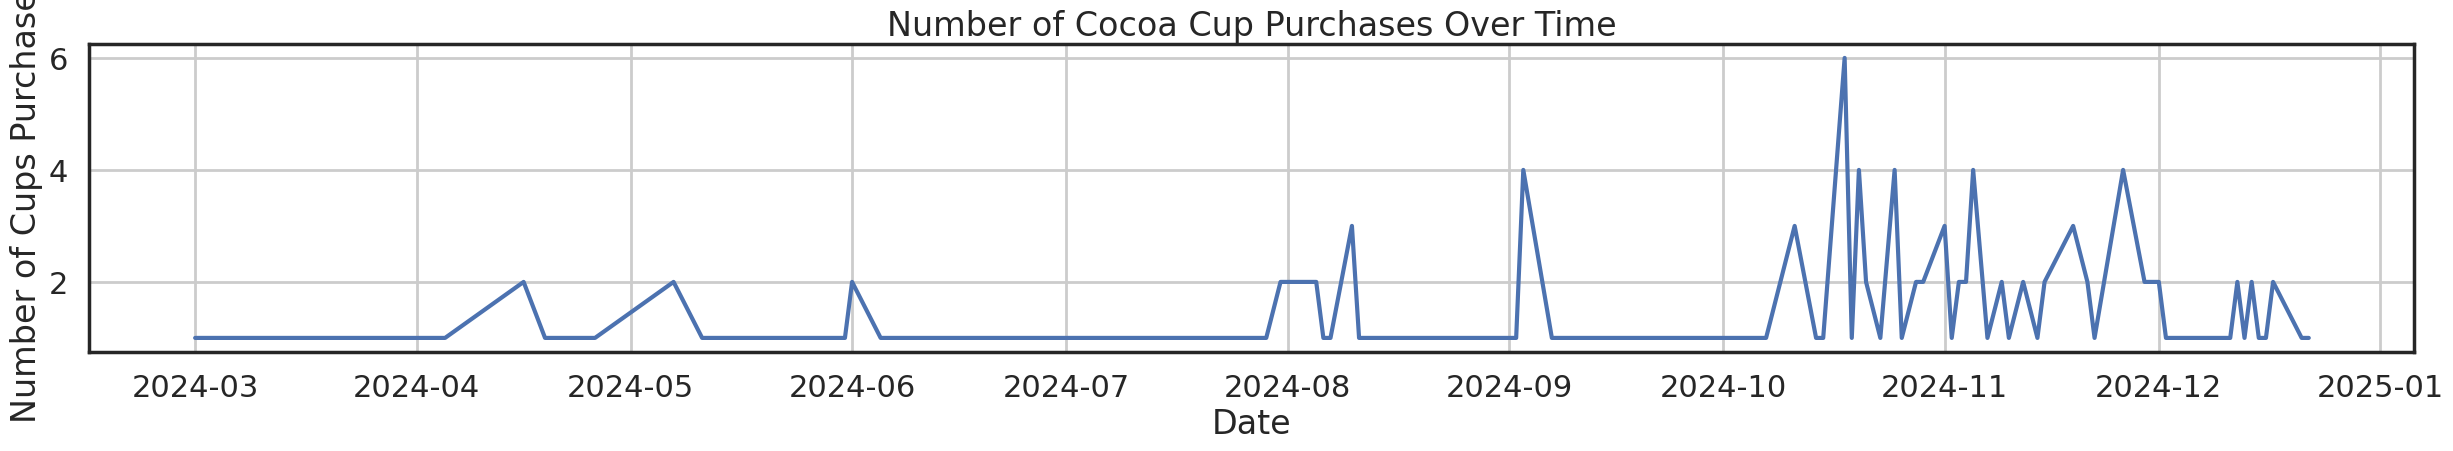

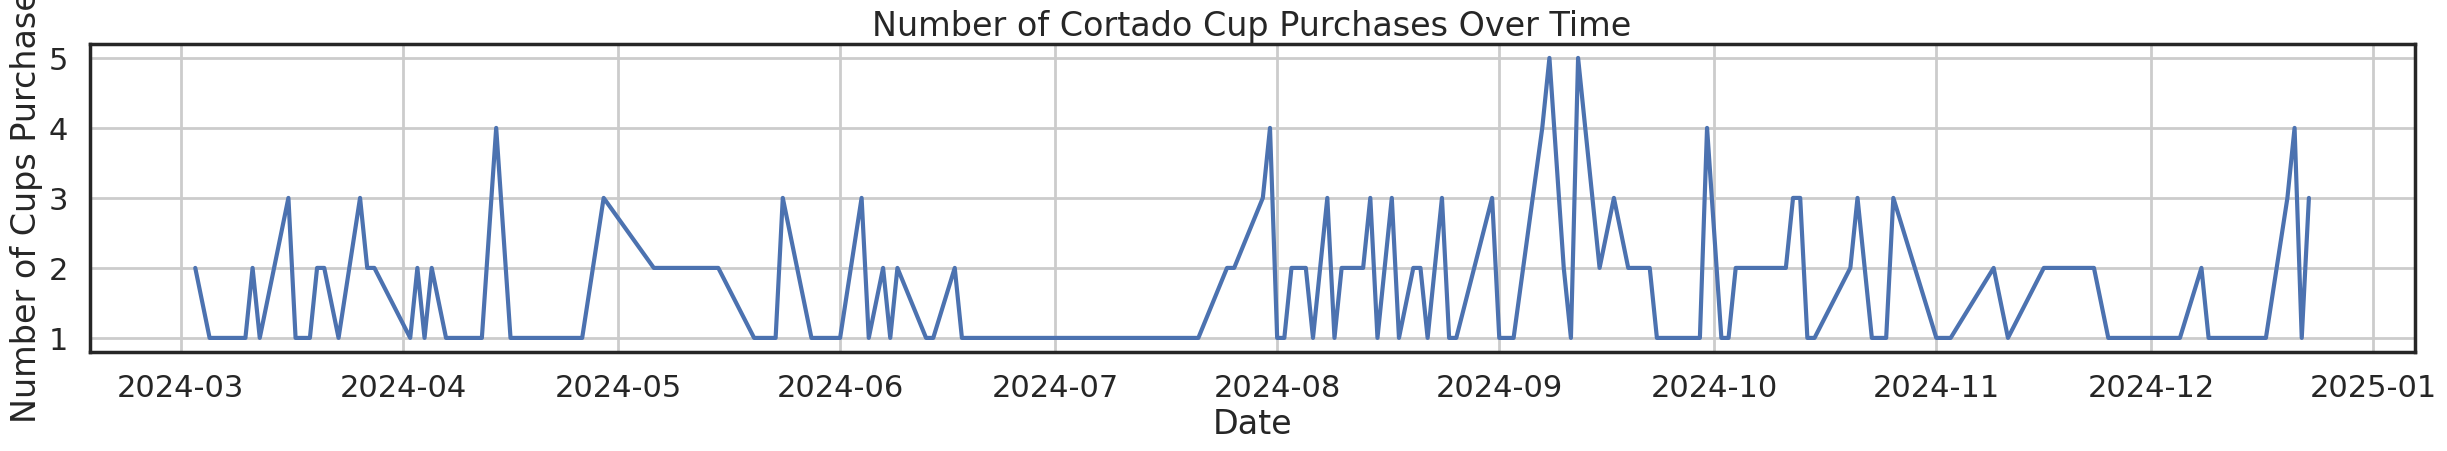

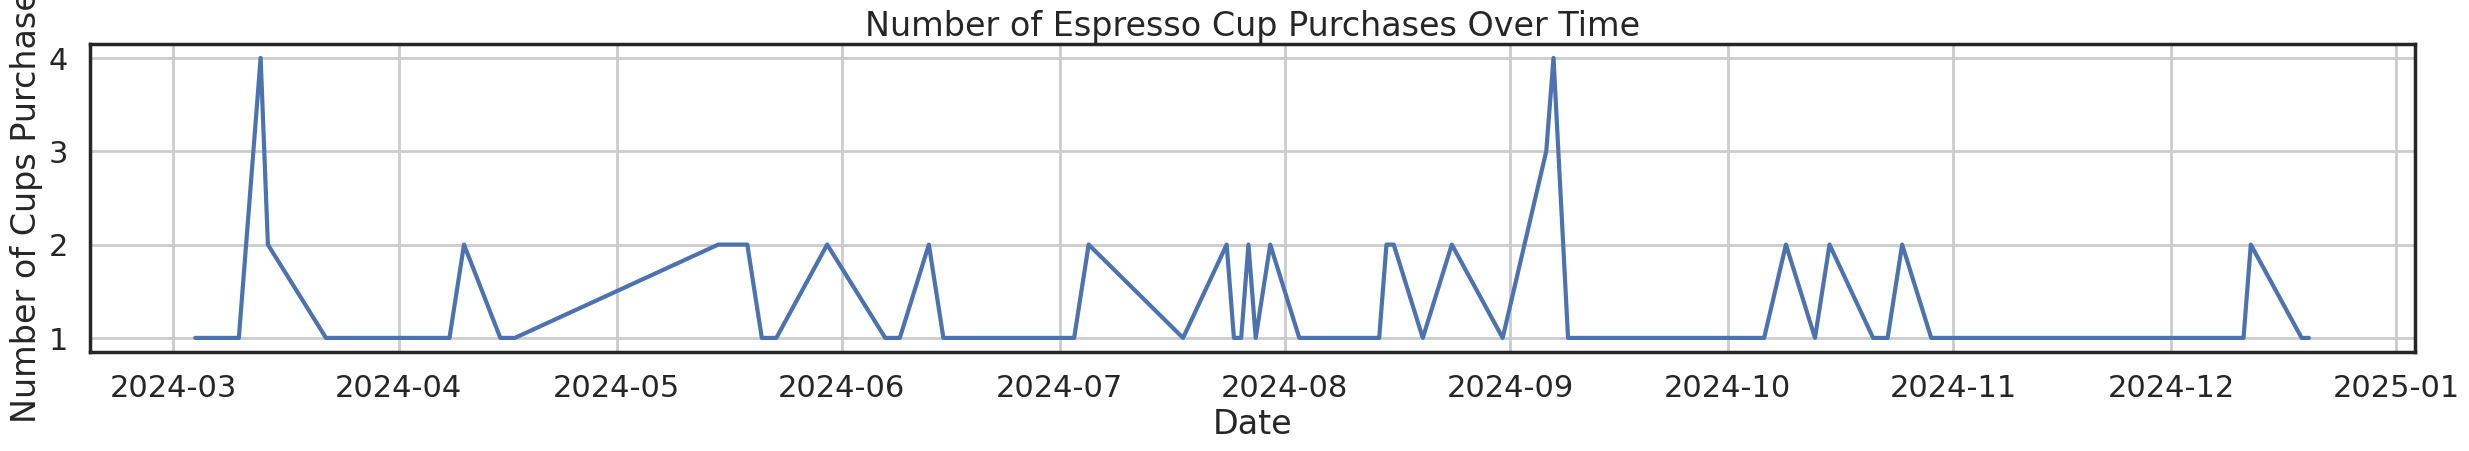

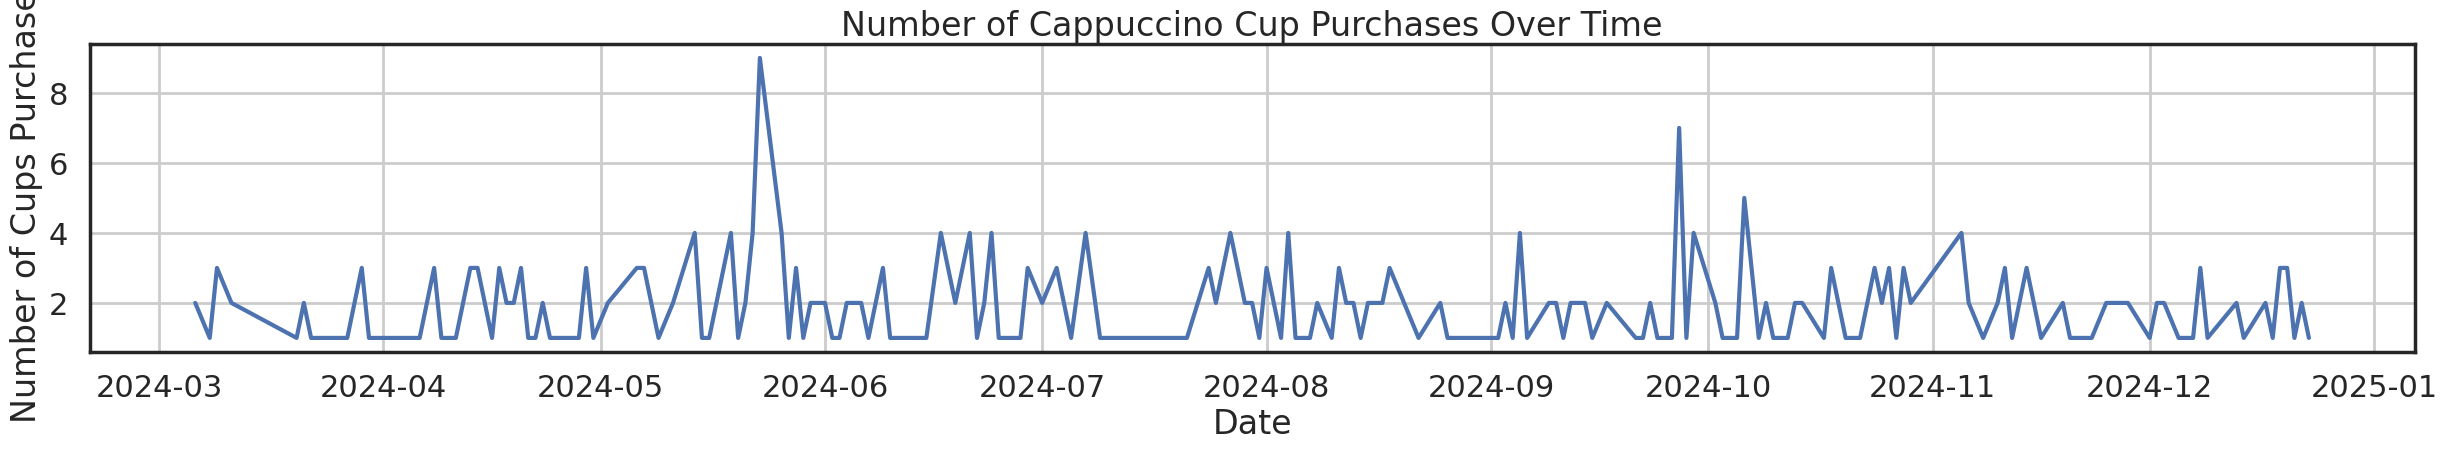

In [10]:
#View frequency of each coffee type through the year

for coffee_name in df['coffee_name'].unique():
    # Filter the dataset for the current coffee name
    coffee_df = df[df['coffee_name'] == coffee_name]
    
    # Calculate the number of cups per day
    coffee_counts = coffee_df['datetime'].dt.date.value_counts().sort_index()
    
    # Plot the results
    plt.figure(figsize=(30, 4))
    coffee_counts.plot(kind='line')
    plt.title(f'Number of {coffee_name} Cup Purchases Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Cups Purchases')
    plt.grid(True)
    plt.show()

### Plot cumulative sales of each coffee type over the year 

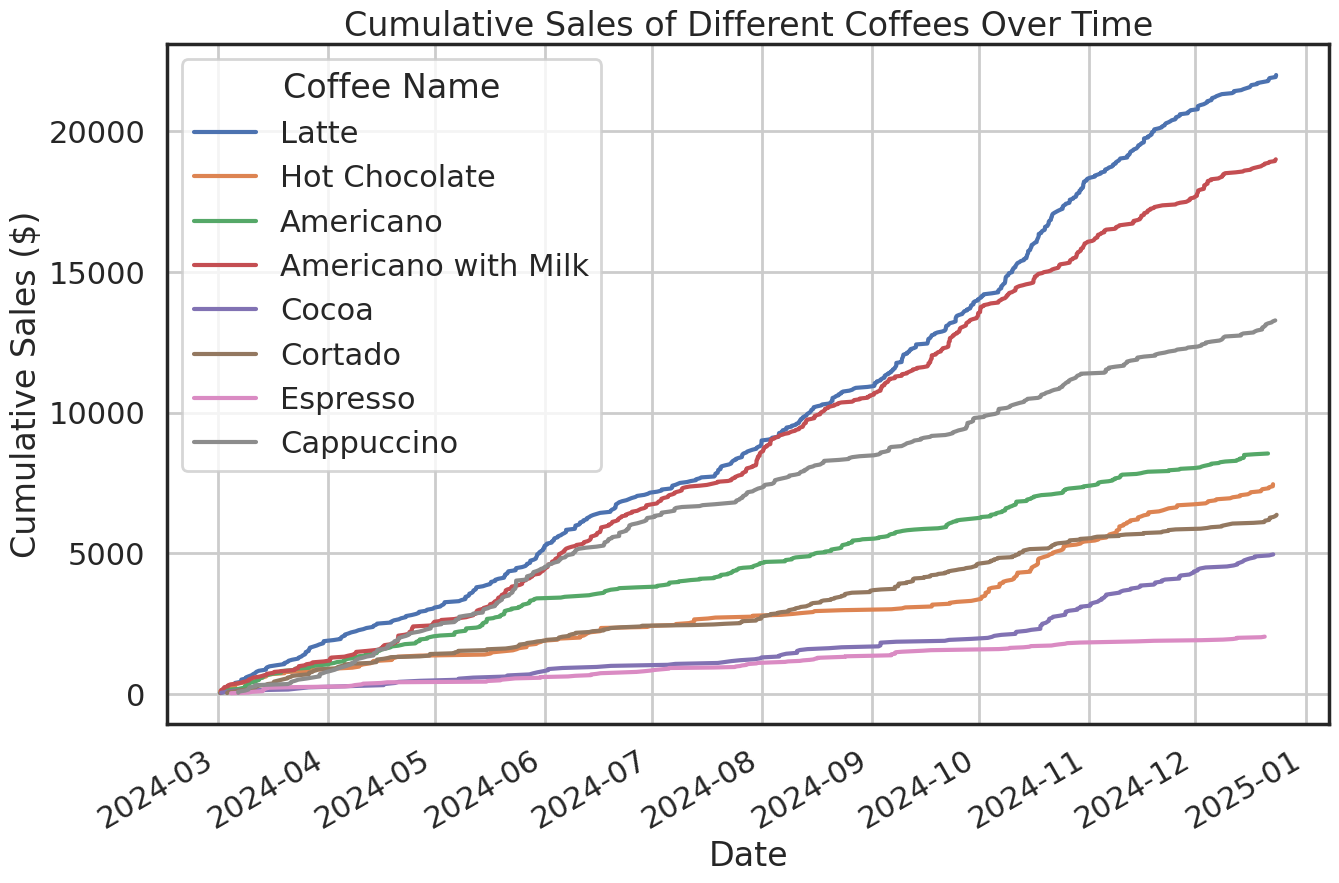

In [11]:
plt.figure(figsize=(15, 10))

for coffee_name in df['coffee_name'].unique():
    coffee_df = df[df['coffee_name'] == coffee_name]
    
    # Calculate the cumulative sum of the 'money' column
    coffee_df = coffee_df.set_index('datetime').sort_index()
    cumulative_sales = coffee_df['money'].cumsum()
    # Plot the cumulative sum of money versus datetime
    cumulative_sales.plot(kind='line', label=coffee_name)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Sales ($)')
plt.title('Cumulative Sales of Different Coffees Over Time')
plt.grid(True)
plt.legend(title='Coffee Name')

# Show the plot
plt.show()

### Identify total sales by coffee type
#### Americano with Milk had the highest sales. 
#### Espresso sold the least. 

In [12]:
coffee_grouping_df = df.groupby('coffee_name')['money'].sum().reset_index()
coffee_grouping_df = coffee_grouping_df.sort_values(by='money', ascending=False)
# Apply styling for max and min
styled_df = coffee_grouping_df.style.format({
    'money': '${:,.2f}'  # Format as currency with 2 decimal places
}).highlight_max(subset=['money'], color='lightgreen').highlight_min(subset=['money'], color='lightcoral')

styled_df

,coffee_name,money
7,Latte,"$22,001.66"
1,Americano with Milk,"$19,004.54"
2,Cappuccino,"$13,278.06"
0,Americano,"$8,546.30"
6,Hot Chocolate,"$7,454.70"
4,Cortado,"$6,366.66"
3,Cocoa,"$4,959.12"
5,Espresso,"$2,035.06"


### View percentage of sales across coffee options as a pie chart to understand distribution

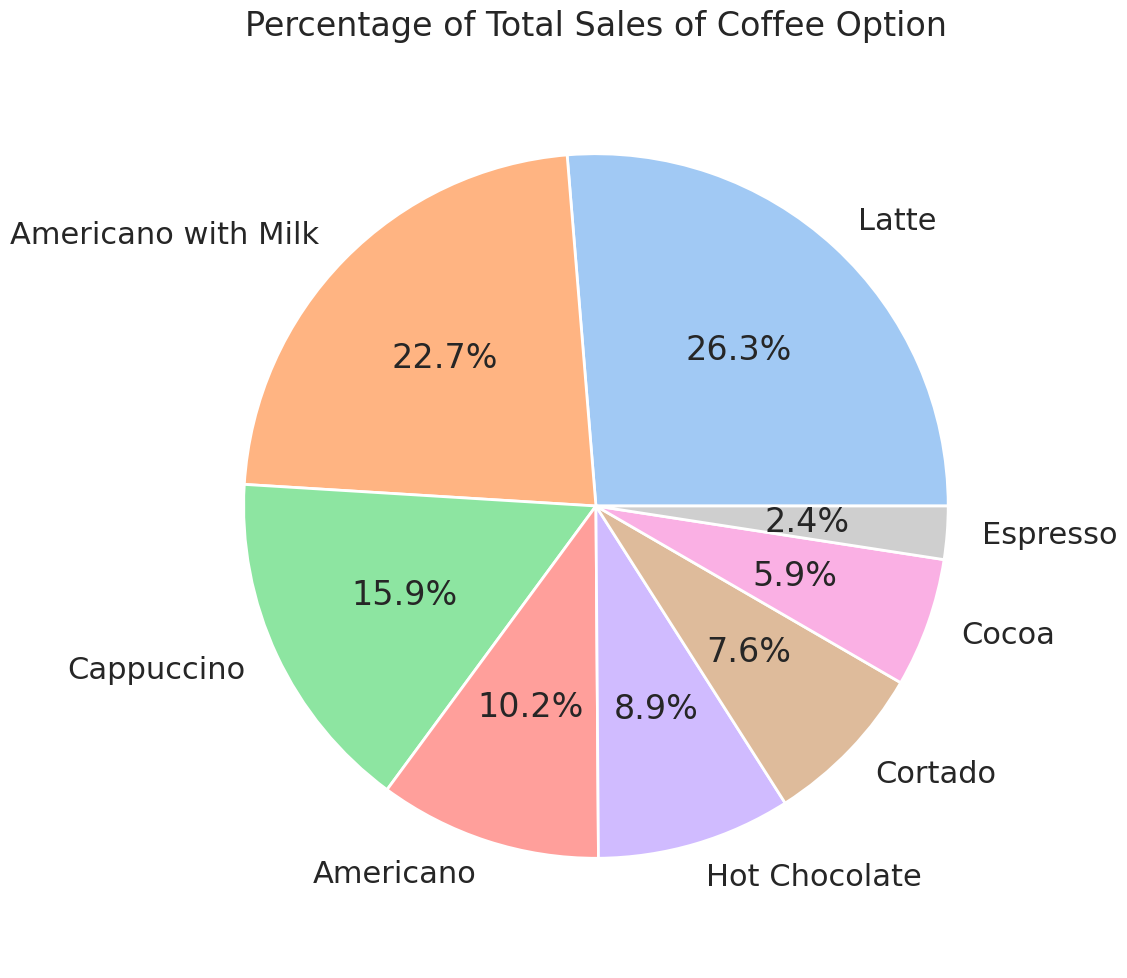

In [13]:
# Create pie chart
plt.figure(figsize=(10, 12))
plt.pie(coffee_grouping_df['money'], 
        labels=coffee_grouping_df['coffee_name'], 
        autopct='%1.1f%%', 
       colors=sns.color_palette('pastel'))
plt.title('Percentage of Total Sales of Coffee Option')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Plot total sales of each coffee type as bar chart

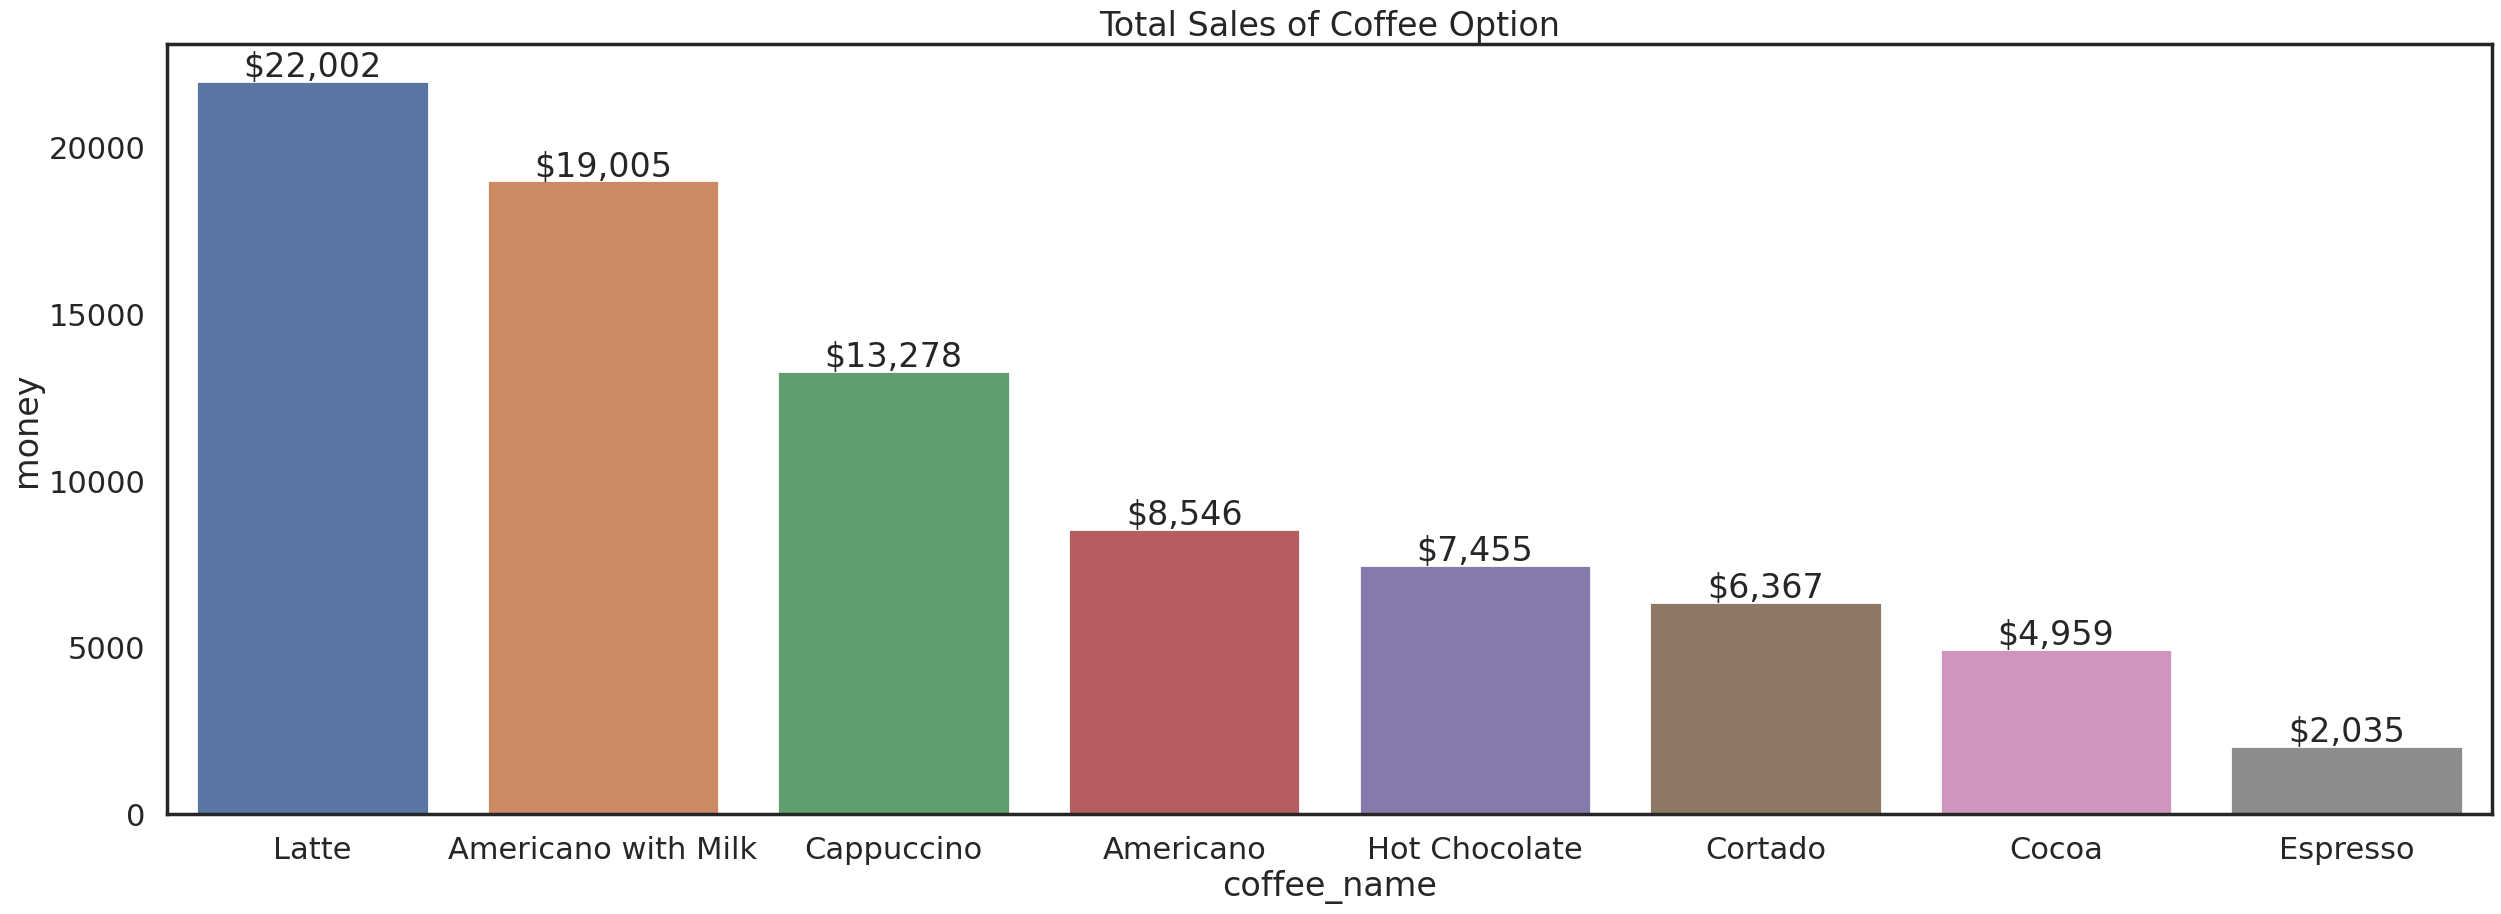

In [14]:
# Create bar chart
plt.figure(figsize=(30, 10))
ax = sns.barplot(data=coffee_grouping_df, 
        x='coffee_name',
        y='money')
plt.title('Total Sales of Coffee Option')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

#### Latte and Americano with Milk are by far the most popular making up 49% of total 2024 sales. 

#### Espesso and Cocoa are least popular making up only 8.3% of total 2024 sales. They can be options to be reviewed to be replaced in this vending coffee machine.

### Understand coffee sales distribution with time 

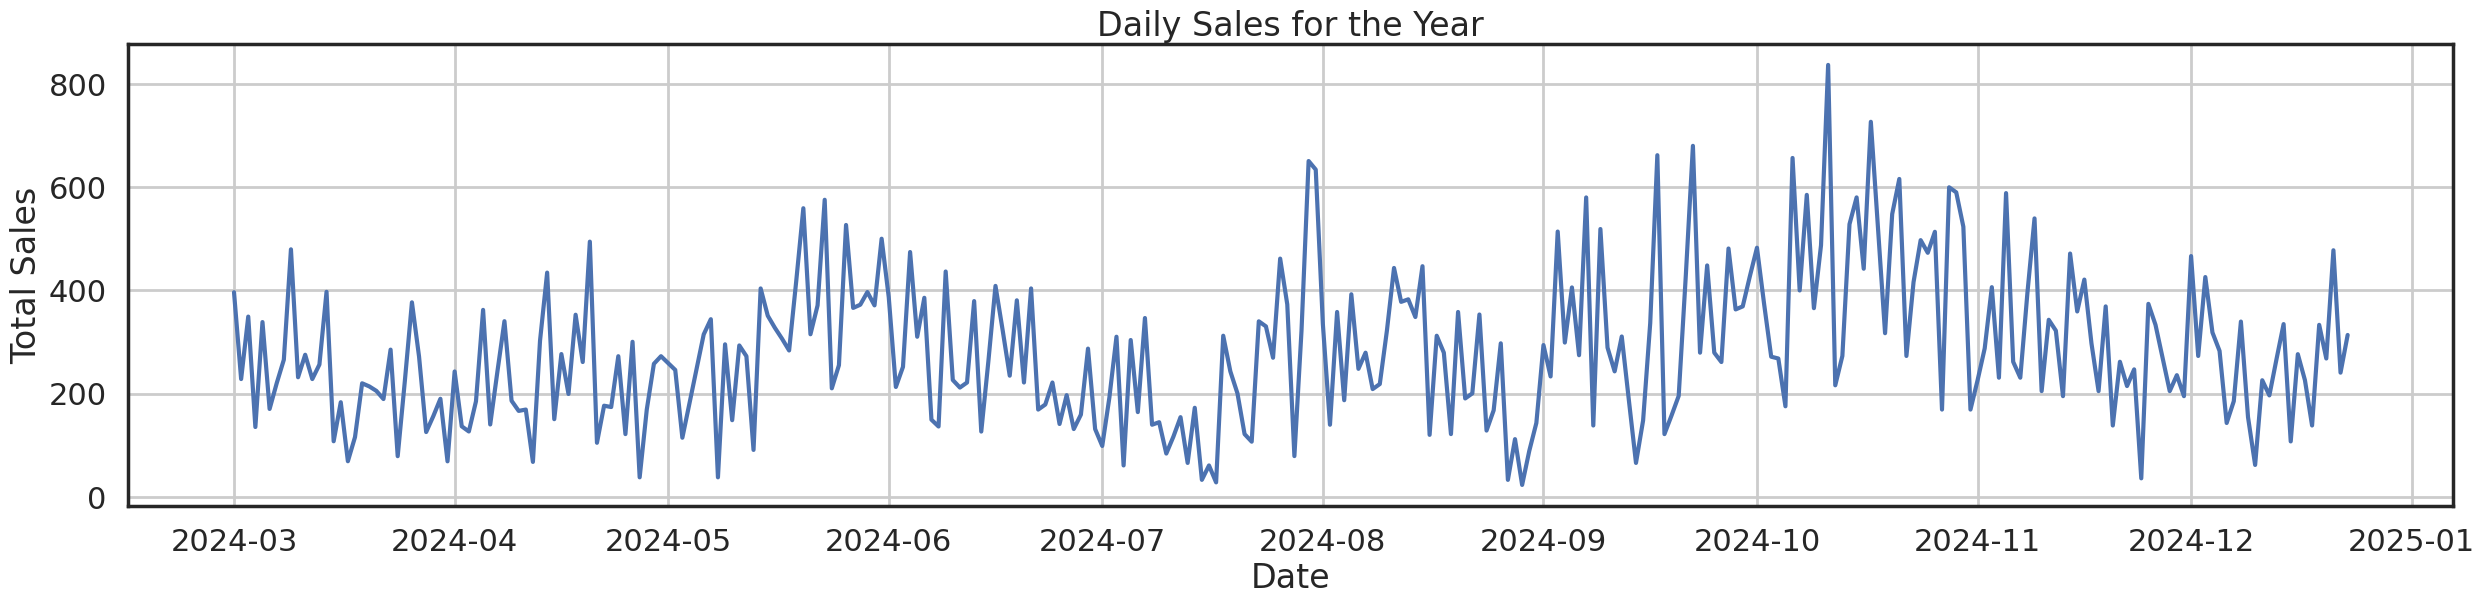

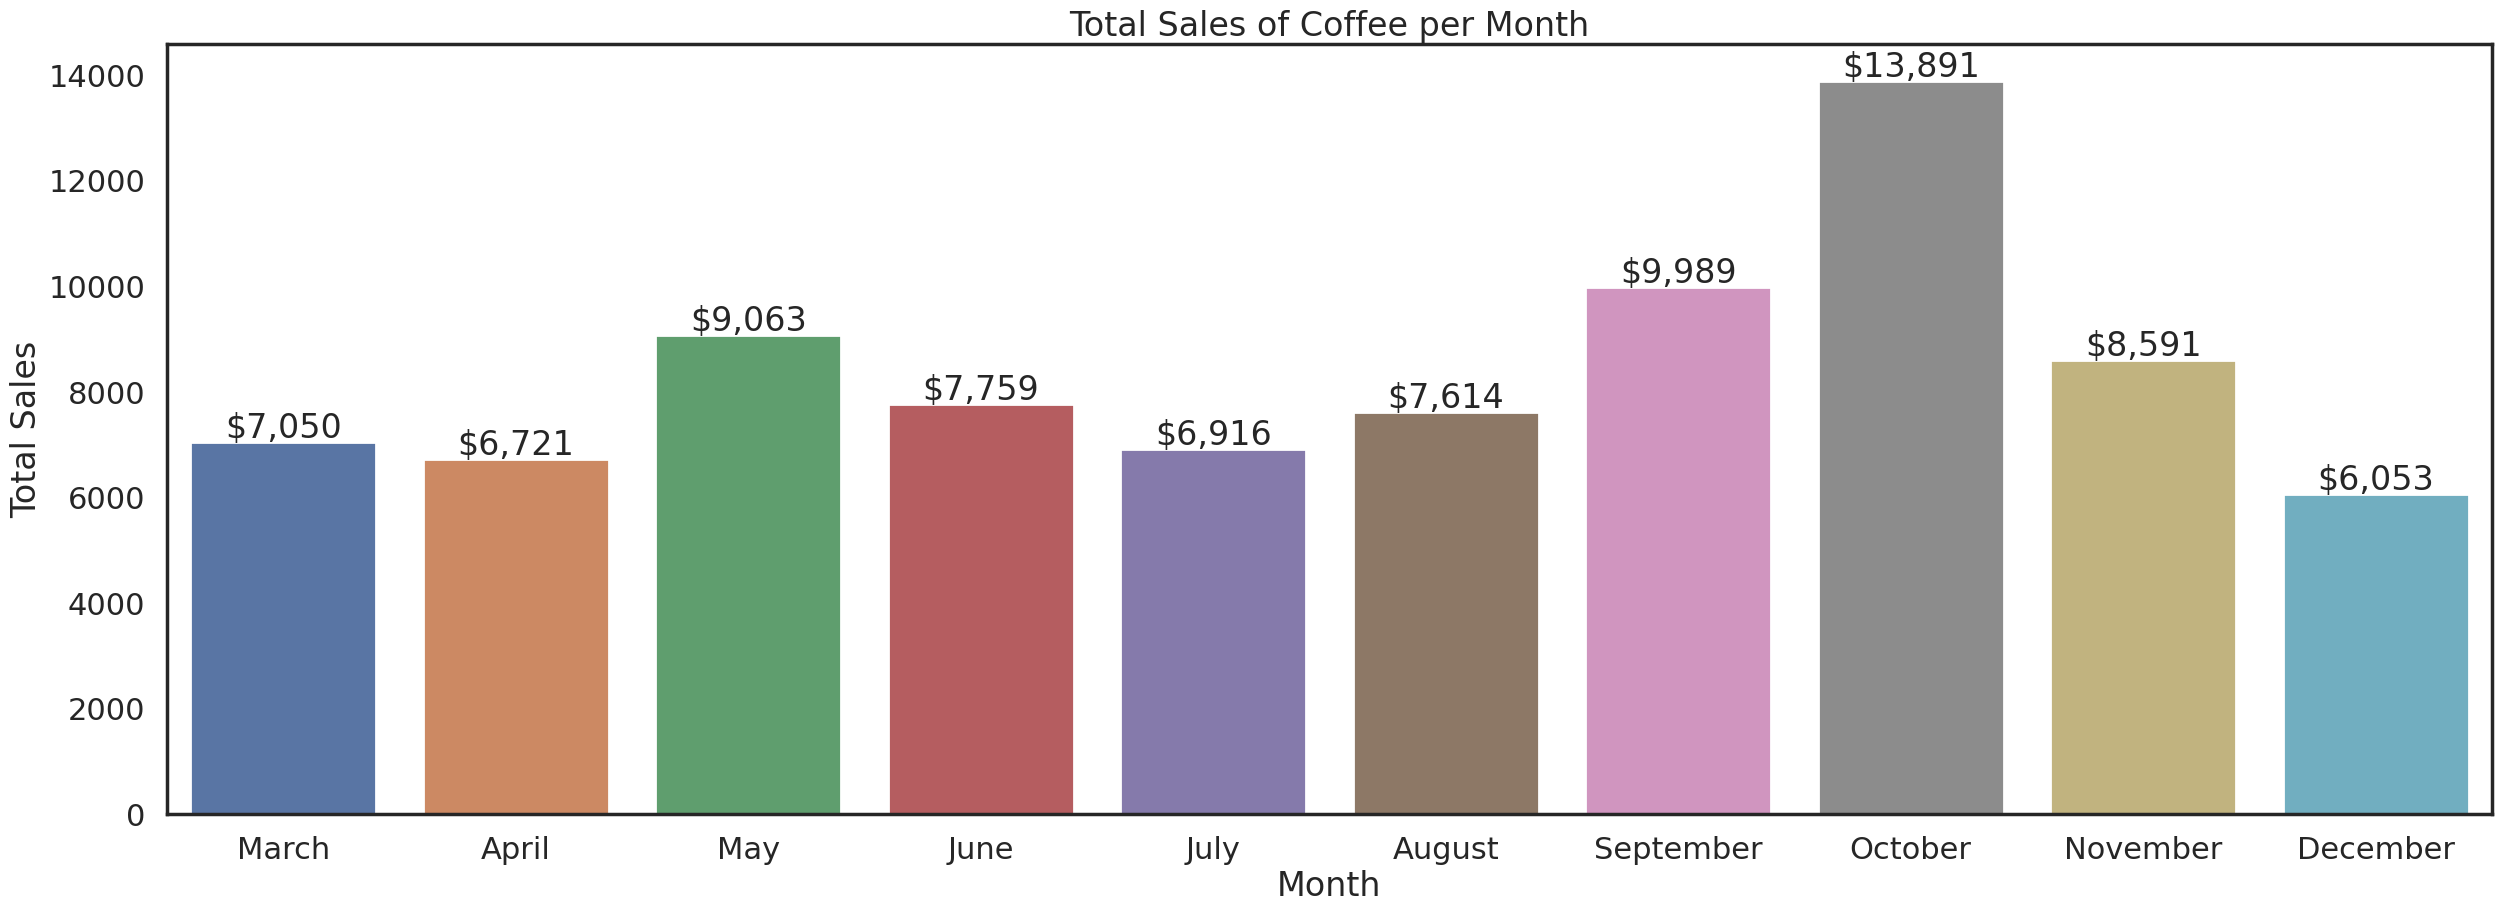

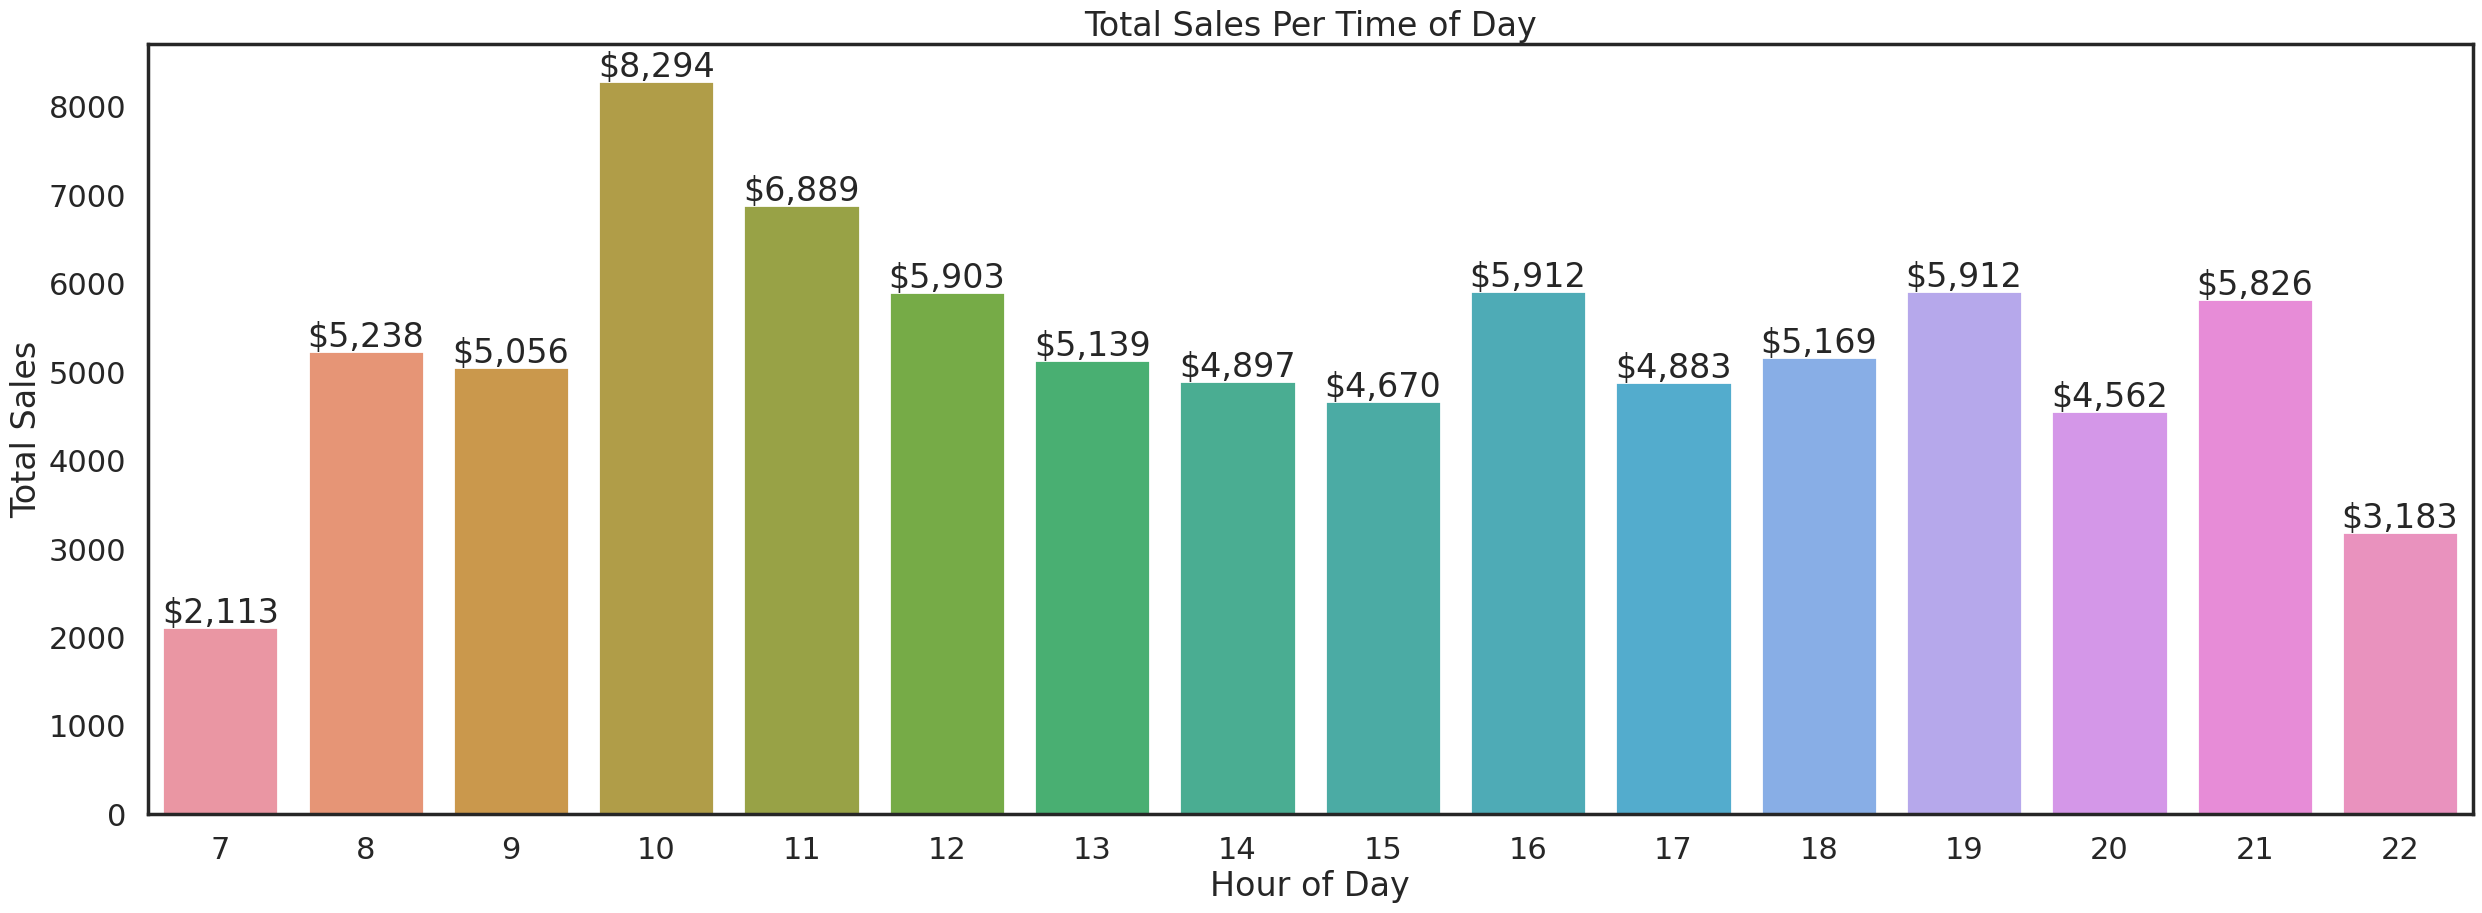

In [15]:
daily_sales = df.groupby(df['datetime'].dt.date)['money'].sum()
monthly_sales = df.groupby(df['datetime'].dt.month)['money'].sum().reset_index()
hourly_sales = df.groupby(df['datetime'].dt.hour)['money'].sum().reset_index()

# Map month numbers to month names
monthly_sales['datetime'] = monthly_sales['datetime'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 
                                               5: 'May', 6: 'June', 7: 'July', 8: 'August', 
                                               9: 'September', 10: 'October', 11: 'November', 12: 'December'})

#Plot timeseries, by month, by hour in a day
plt.figure(figsize=(30, 6))
daily_sales.plot(kind='line')
plt.title('Daily Sales for the Year')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

plt.figure(figsize=(30, 10))
ax = sns.barplot(data=monthly_sales, 
        x='datetime',
        y='money')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales of Coffee per Month')
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

plt.figure(figsize=(30, 10))
ax = sns.barplot(data=hourly_sales, 
        x='datetime',
        y='money')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.title('Total Sales Per Time of Day')
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

### Identify preferred payment method

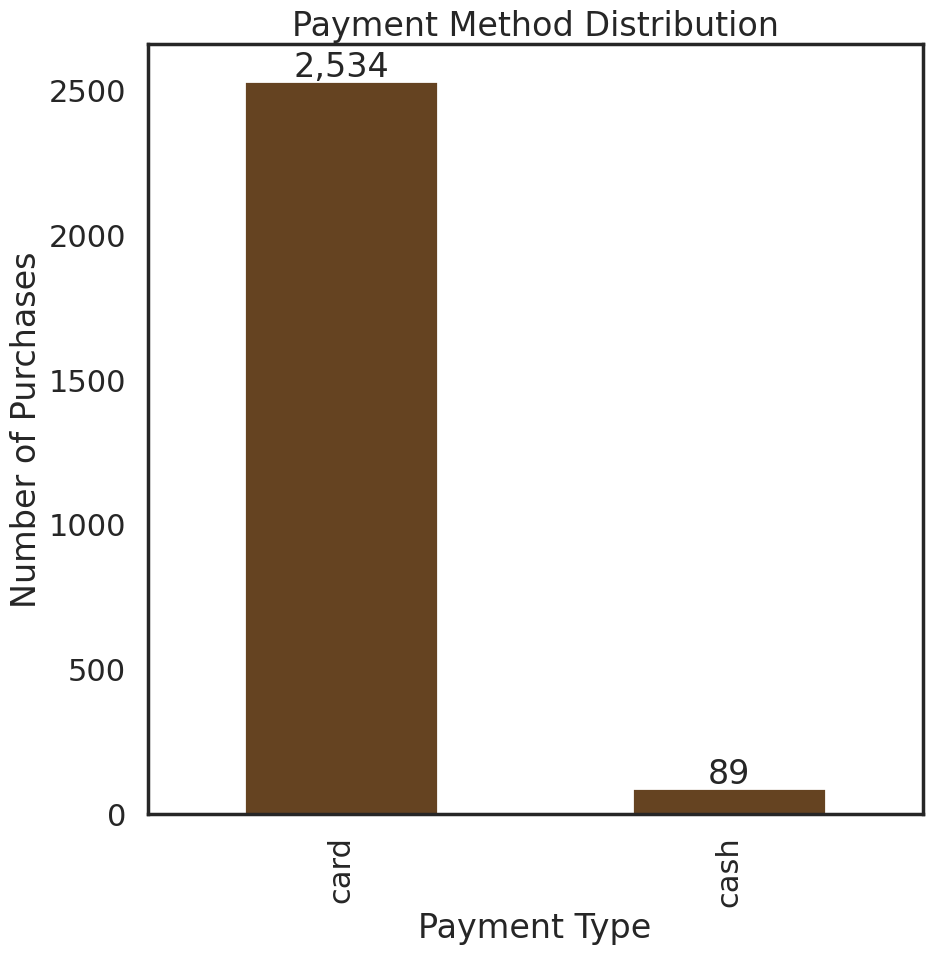

In [16]:
payment_type_df = df['cash_type'].value_counts()
plt.figure(figsize=(10, 10))
ax = payment_type_df.plot(kind='bar', color='#654321')
plt.xlabel('Payment Type')
plt.ylabel('Number of Purchases')
plt.title('Payment Method Distribution')

# Annotate the bars with the value counts
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()
